<a href="https://colab.research.google.com/github/alpellario/Kaggle-ML-Competition-Titanic-AdClicks/blob/main/%5BTR%5DKaggle_Competition_Titanic_Survival_%26_Ad_Click_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
<tr>
<td></td><td></td>
<td>
<img src="https://i.hizliresim.com/3rdzxpx.png" width="200" height="200" />
</td>
<td></td>
<td style="padding-left:40px;">

# <strong>SERKAN KAAN KUHEYLAN</strong><br>
## <a href="https://github.com/alpellario?tab=repositories" target=”_blank”>Visit my GitHub repositories</a><br>
## <a href="https://www.linkedin.com/in/serkan-kaan-k%C3%BCheylan-a482b3180/" target=”_blank”>Visit my LinkedIn account</a>
## <a href="https://serkankaankuheylan.com/" target=”_blank”>Visit my Website</a>
</td>
</tr>
</table>


### 1. **Kaggle Competition** - **Titanic** - Machine Learning from Disaster
### 2. **Advertisement Dataset** - Ad Click Prediction

# 1. Kaggle Yarışması - Titanic - Machine Learning from Disaster


Bu yarışmada, Kaggle bizden yolcu verilerini (isim, yaş, cinsiyet, sosyo-ekonomik sınıf vb.) kullanarak "Titanik'te hangi tür insanların hayatta kalma olasılığı daha yüksekti?" sorusuna cevap verecek bir tahmin modeli oluşturmamızı istiyor.
https://www.kaggle.com/competitions/titanic/overview

*  Projeye ilk olarak veri setinin kapsamlı bir analiziyle başlayacağım. Bu aşamada Exploratory Data Analysis (EDA) yöntemleriyle verileri inceleyip, eksik veya hatalı veri noktalarını belirleyeceğim. İstatistiksel özetler ve görselleştirme teknikleri kullanarak, veri setindeki özellikler arasındaki ilişkileri ve hayatta kalma şansı üzerinde etkili olabilecek faktörleri ortaya çıkarmaya çalışacağım.

*  Eksik verileri tespit ettikten sonra, Data Cleaning işlemleriyle bu eksiklikleri gidermeye ve veri setini modellemeye hazır hale getirmeye odaklanacağım. Temizlenmiş veriler üzerinde, makine öğrenimi modelimin daha iyi öğrenmesini sağlamak için kategorik değişkenleri sayısal formata dönüştüreceğim. Bu işlem, modelin kategorik özellikleri daha etkin bir şekilde kullanabilmesini sağlayacak.

*  Sonrasında, Logistic Regression modelini inşa edip eğiteceğim. Bu modeli kullanarak yolcuların hayatta kalma olasılığını tahmin edeceğim ve sonuçları Kaggle yarışma sayfasına yükleyeceğim. Modelimin performansını, karşılaştırma metrikleri ve kaggle lider tablosu üzerinden değerlendirip, elde ettiğim sonuçları da paylaşacağım. Bu süreç, veri bilimi yolculuğumda önemli bir öğrenme deneyimi olacak ve umarım başarılı sonuçlar elde edeceğim.

## Import Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

Titanic veriseti hali hazırda kaggle tarafından train ve test olarak ayrılmış.

In [79]:
train = pd.read_csv('titanic_train.csv')

test = pd.read_csv('titanic_test.csv')

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **Survived:** Hayatta Kalma Durumu (0 = Hayır, 1 = Evet)
- **pclass:** Bilet Sınıfı (1 = Birinci Sınıf, 2 = İkinci Sınıf, 3 = Üçüncü Sınıf)
- **sex:** Cinsiyet
- **Age:** Yaş (yıllar olarak)
- **sibsp:** Titanic'te beraber yolculuk edilen kardeş veya eş sayısı
- **parch:** Titanic'te beraber yolculuk edilen ebeveyn veya çocuk sayısı
- **ticket:** Bilet Numarası
- **fare:** Yolcu Ücreti
- **cabin:** Kabin Numarası
- **embarked:** Biniş yapılan Liman (C = Cherbourg, Q = Queenstown, S = Southampton)

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis


### Missing Data


In [87]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Missing Data')

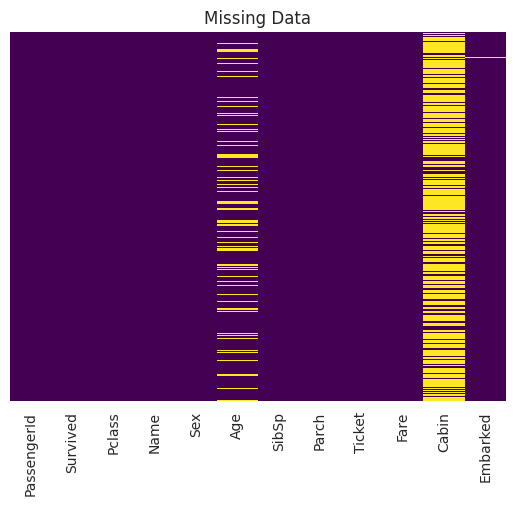

In [88]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

Bu tablo, Titanic veri setindeki eksik verileri gösteriyor. Sarı çizgiler, belirli sütunlarda eksik veri olduğunu ifade ediyor. "Age" (Yaş) sütununun kabaca %20si eksik ancak bu eksikler veri setindeki diğer yaş verilerinin ortalamasını kullanarak doldurulabilir. "Cabin" (Kabin) bilgileri ise büyük oranda eksik ve bu eksikliklerin çokluğu nedeniyle bu sütunu veri setinden çıkarmak daha mantıklı olacaktır. "Embarked" (Binilen Liman) sütununda yalnızca bir eksik veri bulunuyor, bu yüzden o ilgili tek satırı sileceğim.

Text(0.5, 1.0, 'Survived count')

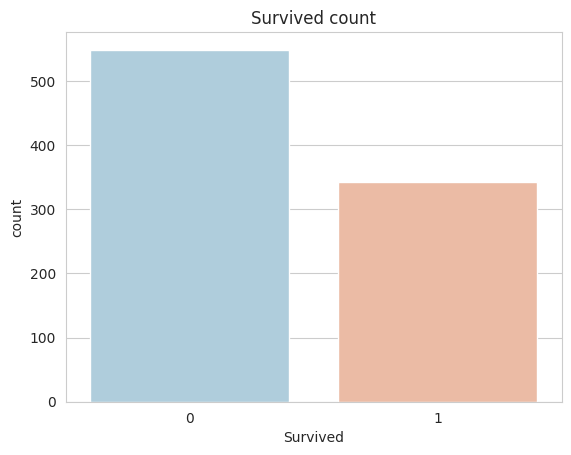

In [108]:
sns.countplot(data=train, x='Survived', palette='RdBu_r', hue='Survived', legend=False)
plt.title('Survived count')

Text(0.5, 1.0, 'Survived count by Sex')

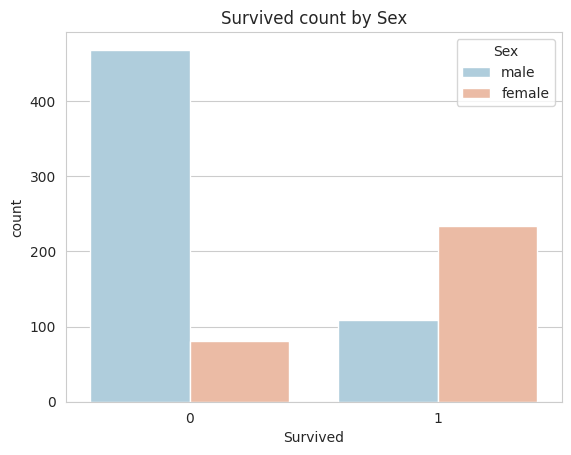

In [101]:
sns.countplot(data=train, x='Survived', palette='RdBu_r', hue='Sex')
plt.title('Survived count by Sex')

Bu grafik, Titanic faciasında hayatta kalan ve hayatını kaybeden yolcuların cinsiyet dağılımını gösteriyor. Mavi sütunlar erkek yolcuları, pembe sütunlar ise kadın yolcuları temsil ediyor. "0" değeri hayatını kaybedenleri, "1" değeri ise hayatta kalanları ifade ediyor.
**Grafikten görebileceğimiz gibi, erkek yolcuların büyük bir kısmı hayatta kalamamış. Kadın yolcular arasında ise hayatta kalma oranı erkeklere göre daha yüksek.** Bu veriler, Titanic'teki "kadınlar ve çocuklar önce" tahliye politikasının bir sonucu olabilir ve aynı zamanda dönemin toplumsal cinsiyet rollerinin bir yansıması olarak da değerlendirilebilir.

Text(0.5, 1.0, 'Survived count by Pclass')

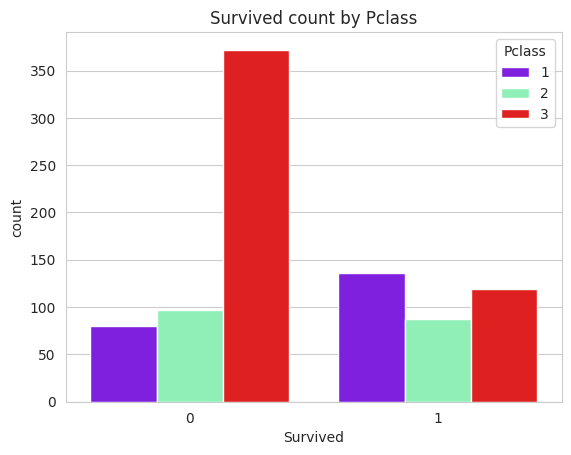

In [100]:
sns.countplot(data=train, x='Survived', hue='Pclass', palette='rainbow')
plt.title('Survived count by Pclass')

Bu grafik, Titanic'teki yolcuların bilet sınıfına göre hayatta kalma durumlarını gösteriyor. Mor sütunlar birinci sınıfı, yeşil sütunlar ikinci sınıfı, kırmızı sütunlar ise üçüncü sınıfı temsil ediyor. "0" değeri hayatını kaybedenleri, "1" değeri ise hayatta kalanları ifade ediyor. Grafikten anlaşılacağı üzere, birinci sınıf yolcular arasında hayatta kalma oranı oldukça yüksekken, üçüncü sınıf yolcular arasında hayatta kalma oranı en düşük. İkinci sınıf yolcuların hayatta kalma oranı ise birinci ve üçüncü sınıf arasında bir yerde. Bu, gemideki tahliye ve kurtarma işlemlerinin sosyoekonomik statüye göre farklılık gösterdiğini düşündürebilir.

Text(0.5, 1.0, 'Age Distribution')

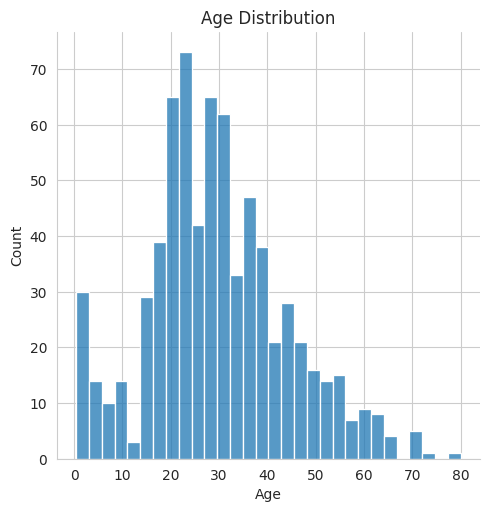

In [103]:
sns.displot(data=train, x=train['Age'].dropna(), kde=False, bins=30)
plt.title('Age Distribution')

Text(0.5, 1.0, 'SibSp count')

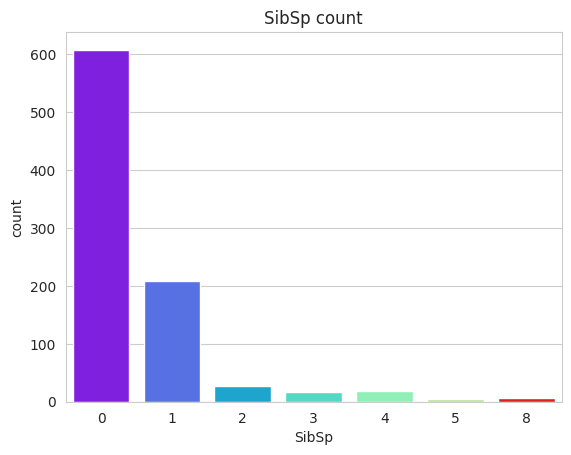

In [107]:
sns.countplot(data=train, x='SibSp', palette='rainbow', hue='SibSp', legend=False)
plt.title('SibSp count')

Text(0.5, 1.0, 'Fare Distribution')

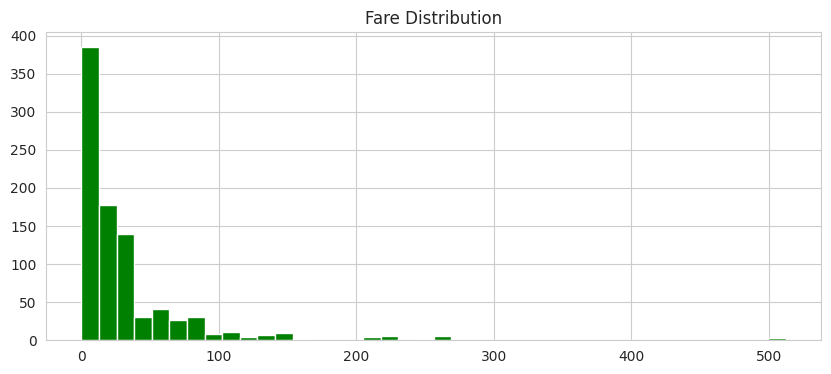

In [113]:
train['Fare'].hist(bins=40, color='green', figsize=(10,4))
plt.title('Fare Distribution')

## Data Cleaning

Önce Age verilerini doldurmakla başlayacağım. Age verilerin yaklaşık %20'si kayıp. Kayıp verileri diğer Age verilerinin ortalamasını alarak dolduracağım. Ama daha isabetli bir ortalama değeri belirlemek için bilet sınıfına(Pclass) göre sınıflandırıp Age verilerini dolduracağım.

Text(0.5, 1.0, 'Age by Pclass')

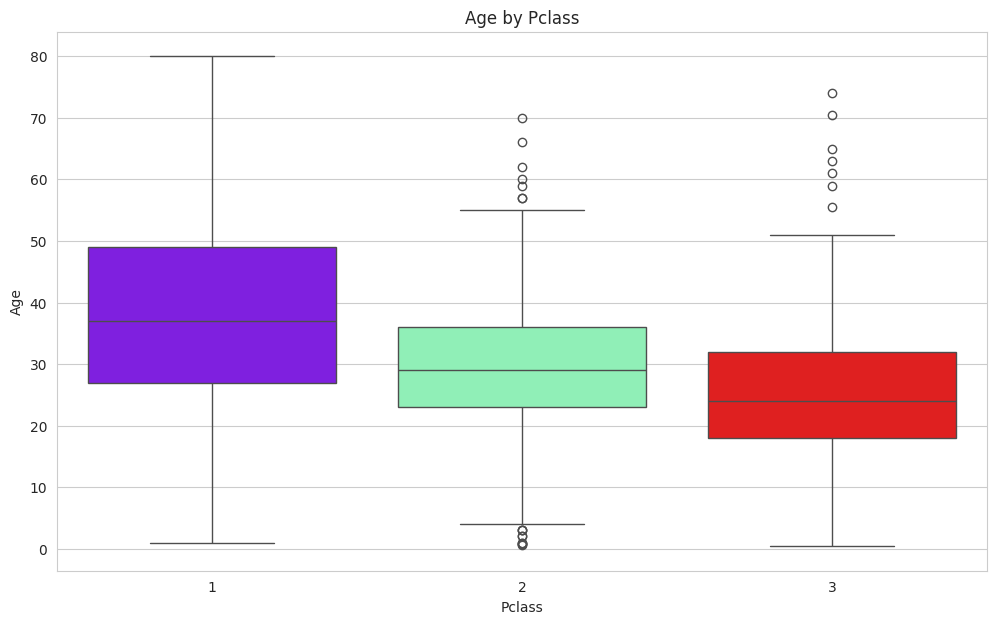

In [118]:
plt.figure(figsize=(12, 7))
#show annot
sns.boxplot(data=train, x='Pclass', y='Age', palette='rainbow', hue='Pclass', legend=False, )
plt.title('Age by Pclass')

In [123]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
      if Pclass == 1:
          return 37
      elif Pclass == 2:
          return 29
      else:
          return 24

    else:
      return Age

In [125]:
train['Age'] =  train[['Age', 'Pclass']].apply(fill_age, axis=1)

Text(0.5, 1.0, 'Missing Data')

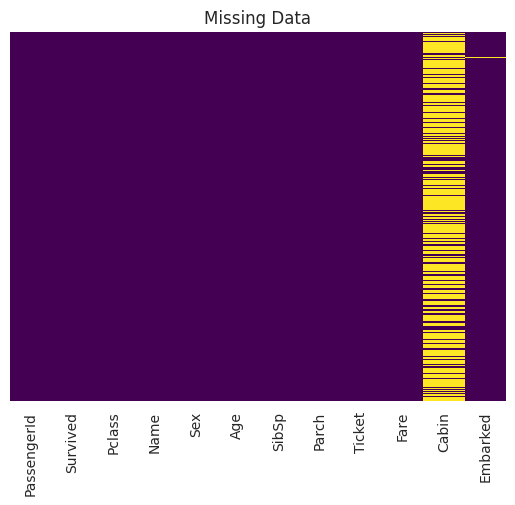

In [126]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

Age alanında grafikte de görüldüğü gibi eksik bir veri kalmadı. Sırada Kabin verileri ile ilgileneceğim. Cabin verilerinin neredeyse hepsi eksik olduğu için bunu anlamlı bir veri olarak olarak kullanma şansımız yok. "Kabin değeri biliniyor" ve "Kabin değeri bilinmiyor" olarak yeni bir özellik çıkarabiliriz fakat bu da modelimiz için anlamlı bir veri olmaz.

In [127]:
train.drop('Cabin', axis=1, inplace=True)

Text(0.5, 1.0, 'Missing Data')

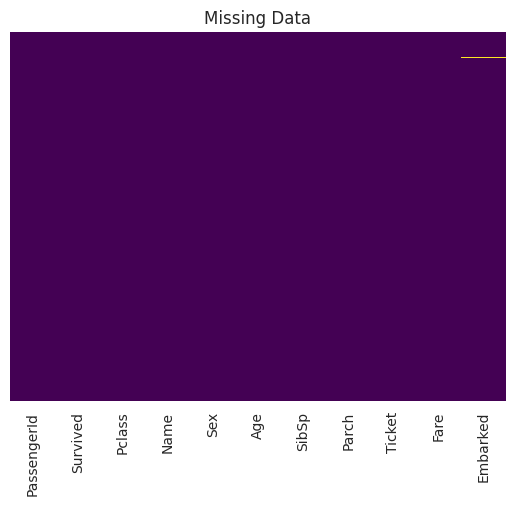

In [128]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

In [129]:
train.dropna(inplace=True)

Text(0.5, 1.0, 'Missing Data')

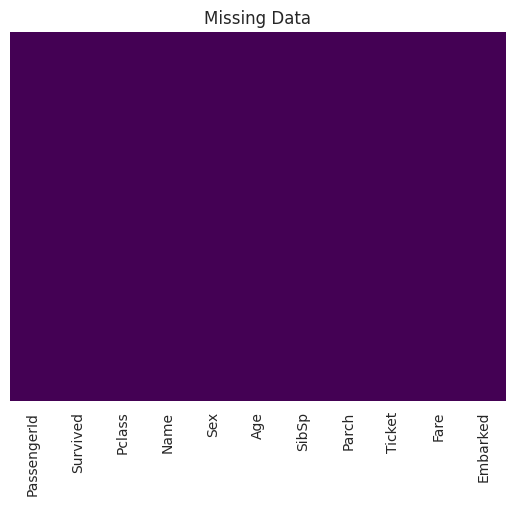

In [130]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

Artık train datasetinde eksik bir veri kalmadı.

In [132]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [133]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


PassengerId değeride veriseti hakkında anlamlı bir değer içermiyor. Tabloda görüldüğü gibi satır index değeriyle aynı index değerine sahip ve sadece yolcuları numaralandırmak için kullanılıyor. Bu yüzden bu sutunu'da kaldırabilirim.

In [134]:
train.drop('PassengerId', axis=1, inplace=True)

In [208]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Text(0.5, 1.0, 'Age by Pclass for Test Data')

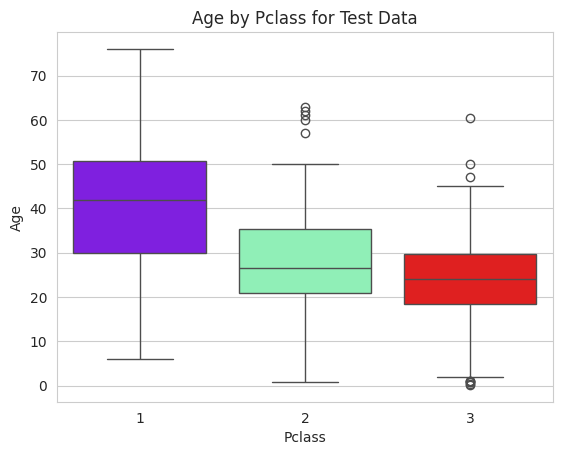

In [138]:
sns.boxplot(data=test, x='Pclass', y='Age', palette='rainbow', hue='Pclass', legend=False, )
plt.title('Age by Pclass for Test Data')

In [139]:
def fill_test_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
      if Pclass == 1:
          return 42
      elif Pclass == 2:
          return 27
      else:
          return 24

    else:
      return Age

In [204]:
test['Age'] =  test[['Age', 'Pclass']].apply(fill_test_age, axis=1)

test.drop(['Cabin'], axis=1, inplace=True)

<Axes: >

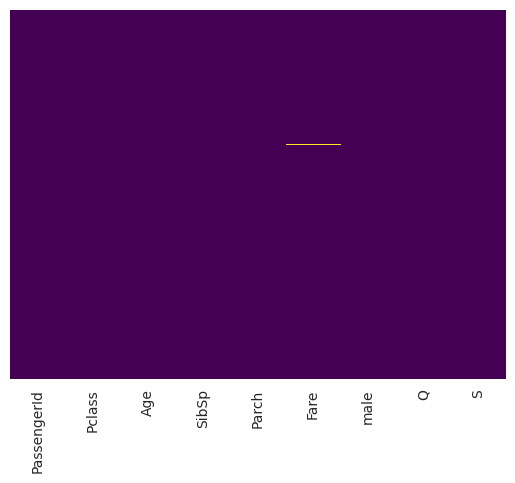

In [219]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Fare'>

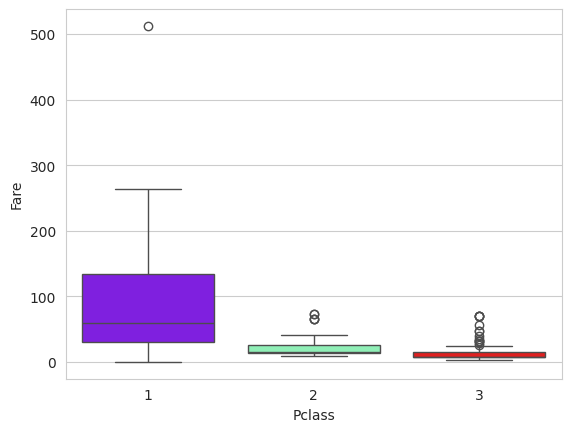

In [221]:
sns.boxplot(data=test, x='Pclass', y='Fare', palette='rainbow', hue='Pclass', legend=False)

In [222]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
152,1044,3,60.5,0,0,NaN,1,0,1


In [234]:
test[test['Pclass'] == 3]['Fare'].mean()

12.459677880184332

In [233]:
test.loc[test['Fare'].isnull(), 'Fare'] = test[test['Pclass'] == 3]['Fare'].mean()

<Axes: >

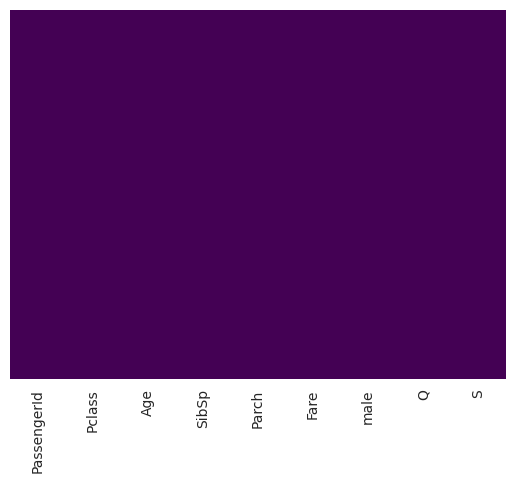

In [237]:
sns.heatmap(data=test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Converting Categorical Features

Sex ve Embarked sutunlarındaki string verilerimizi modelin anlayabilmesi için sayısal veriye dönüştürmemiz gerekiyor.

In [153]:
train[['Sex', 'Embarked']].head(5)

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [155]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [210]:
sex_test = pd.get_dummies(test['Sex'], drop_first=True)

embark_test = pd.get_dummies(test['Embarked'], drop_first=True)

In [157]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [161]:
train.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)

In [211]:
test.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)

In [162]:
train = pd.concat([train, sex, embark], axis=1)

In [212]:
test = pd.concat([test, sex_test, embark_test], axis=1)

In [163]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [213]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


# Building a Logistic Regression model

In [164]:
from sklearn.linear_model import LogisticRegression

In [166]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [184]:
X_train = train.drop(['Survived'], axis=1)

y_train = train['Survived']

In [192]:
log_model = LogisticRegression(max_iter=1000)

In [193]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [238]:
predictions = log_model.predict(test.drop(['PassengerId'], axis=1))

In [239]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [240]:
len(predictions)

418

In [252]:
pred_survived = pd.Series(predictions, name='Survived')

In [253]:
csv = pd.concat([test['PassengerId'], pred_survived], axis=1)

In [255]:
csv.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [256]:
csv.to_csv('submission.csv', index=False)

Logistic Regression modelimi Kaggle'a yükledim ve sonuçlar gerçekten iyi geldi! Test setinde neredeyse %80 doğruluk oranı yakalamışım. Bu benim için süper bir haber çünkü tüm o veri temizleme, kategorik özellikleri dönüştürme ve modeli eğitme çabalarımın karşılığını aldığımı gösteriyor. Kaggle'daki sonuç sayfamın ekran görüntüsünü buraya koydum, böylece görebilirsiniz.

![](https://i.hizliresim.com/h9jhg9f.PNG)



---

---



---



---





---



---



---




# 2. **Advertisement Dataset** - Ad Click Prediction

Bu projede, bir grup internet kullanıcılarının bir reklama tıklayıp tıklamadığını gösteren bir reklam veri seti ile çalışacağım. Kullanıcının çeşitli özelliklerine dayanarak bir reklama tıklayıp tıklamayacaklarını tahmin edecek bir model oluşturmayı deneyeceğim.


## Import Libraries


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Get the Data



*  **Daily Time Spent on Site**: Kullanıcıların sitenizde geçirdiği günlük ortalama süre (dakika).
*  **Age**: Kullanıcıların yaşı (yıl).
*  **Area Income**: Kullanıcıların yaşadığı bölgenin ortalama geliri.
*  **Daily Internet Usage**: Kullanıcıların günlük internet kullanım süresi (dakika).
*  **Ad Topic Line**: Kullanıcının gördüğü reklamın başlığı.
*  **City**: Kullanıcının yaşadığı şehir.
*  **Male**: Kullanıcının erkek olup olmadığı (1: erkek, 0: kadın).
*  **Country**: Kullanıcının ülkesi.
*  **Timestamp**: Kullanıcının reklama tıkladığı veya pencereyi kapattığı zaman.
*  **Clicked on Ad**: Kullanıcının reklama tıklayıp tıklamadığı (1: tıkladı, 0: tıklamadı).

In [7]:
ADS = pd.read_csv('advertising.csv')

In [8]:
ADS.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [10]:
ADS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [11]:
ADS.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000



- **Günlük Site Üzerinde Geçirilen Zaman**: Ortalama olarak kullanıcılar yaklaşık 65 dakika site üzerinde zaman geçiriyor. En az 32 dakika ve en fazla 91 dakika arasında bir süre geçiriyorlar.

- **Yaş**: Kullanıcıların yaş ortalaması yaklaşık 37. Yaşları 19 ile 61 arasında değişiyor.

- **Bölge Geliri**: Ortalama bölge geliri yaklaşık 55.000 dolar. Gelir aralığı yaklaşık 13.996 dolar ile 79.484 dolar arasında değişiyor.

- **Günlük İnternet Kullanımı**: Kullanıcılar ortalama 180 dakika internet kullanıyor. Kullanım süresi en az 104 dakika ve en fazla 270 dakika arasında.

- **Erkek**: Veri setindeki kullanıcıların yaklaşık yarısı erkek.

- **Bir Reklama Tıklama**: Kullanıcıların yarısı en az bir kere reklama tıklamış.

Veri setindeki "std" sütunu standart sapmayı gösterir ve bu da ölçülen değerlerin ne kadar yayıldığını belirtir. Örneğin, bölge geliri ve günlük internet kullanımındaki yüksek standart sapma, bu değerlerin oldukça değişken olduğunu ve farklı kullanıcılar arasında büyük farklılıklar gösterebileceğini gösterir. Diğer yandan, "cinsiyet" ve "bir reklama tıklama" için standart sapma (yaklaşık 0.5), bu oranların veri setindeki kullanıcılar arasında neredeyse eşit olarak bölündüğünü gösterir.

İstatistiksel ölçütlerin yüzdelik dilimleri (25%, 50% ve 75%), verilerin dağılımını daha iyi anlamak için yardımcı olur. Örneğin, medyan (50% dilimi), kullanıcıların yarısının site üzerinde 68.21 dakikadan daha az, diğer yarısının ise daha fazla zaman geçirdiğini gösterir. Bu, veri dağılımının merkezini temsil eder ve ortalamadan daha az etkilenir.

## Exploratory Data Analysis


In [13]:
sns.set_style('whitegrid')

<Axes: xlabel='Age', ylabel='Count'>

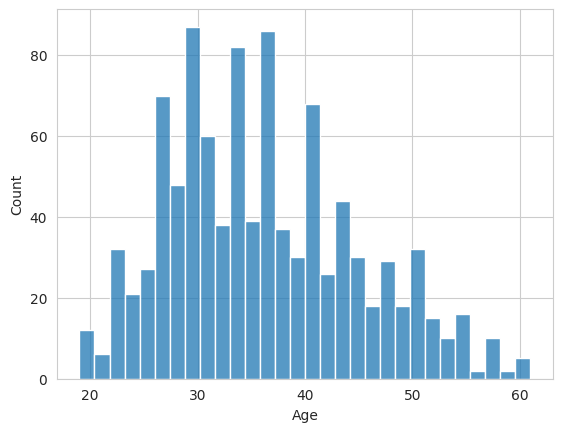

In [17]:
sns.histplot(data=ADS, x='Age', kde=False,bins=30)

Bu histogram, veri setindeki kişilerin çoğunun 20-40 yaş arasında olduğunu gösteriyor. 30 yaş civarında bir yoğunluk tepe noktası var ve 50 yaş üzerindeki kişi sayısı azalıyor.

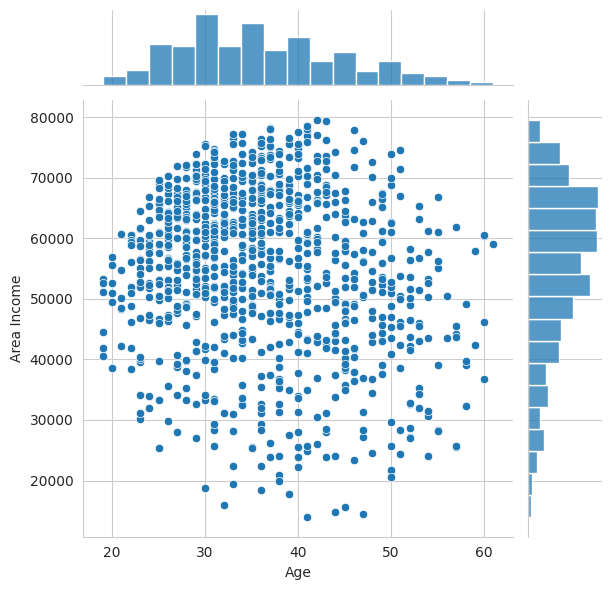

In [18]:
sns.jointplot(data=ADS, x='Age', y='Area Income')

Bu saçılım grafiği, yaşa göre bölge gelirini gösteriyor ve veri noktalarının dağılımına bakarsak bir eğilim olmadığını, yani yaşın bölge geliri üzerinde belirgin bir etkisi olmadığını gösteriyor. Yaş histogramı ve gelir dağılımı, çoğu kişinin 20-40 yaş aralığında olduğunu ve çoğunluğun yıllık 40.000 ile 70.000 dolar arası bir gelire sahip olduğunu belirtiyor.

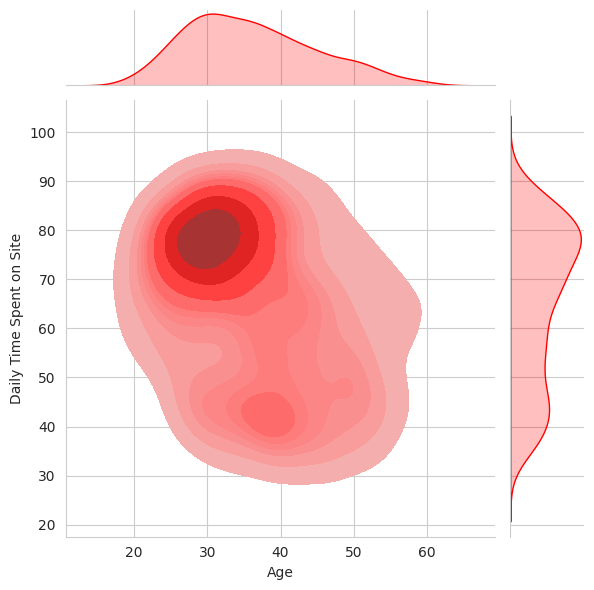

In [76]:
sns.jointplot(data=ADS, x='Age', y='Daily Time Spent on Site', kind='kde', fill=True, color='red')

Grafik, yaş ile günlük web sitesinde geçirilen zaman arasındaki yoğunluk dağılımını gösteren bir KDE (çekirdek yoğunluk tahmini) grafiğidir. En yüksek yoğunluk noktası, 30 yaş civarında ve günlük olarak yaklaşık 80 dakika site üzerinde zaman geçiren kullanıcılarda görülüyor. Hem yaş hem de sitede geçirilen zaman açısından verilerin çoğunluğu bu bölgeye yoğunlaşmış durumda. Yaş ve site üzerinde geçirilen zaman arasında doğrudan bir ilişki gözlenmiyor, ancak genç kullanıcıların günlük olarak daha fazla zaman geçirdiği bir yoğunluk alanı bulunuyor.

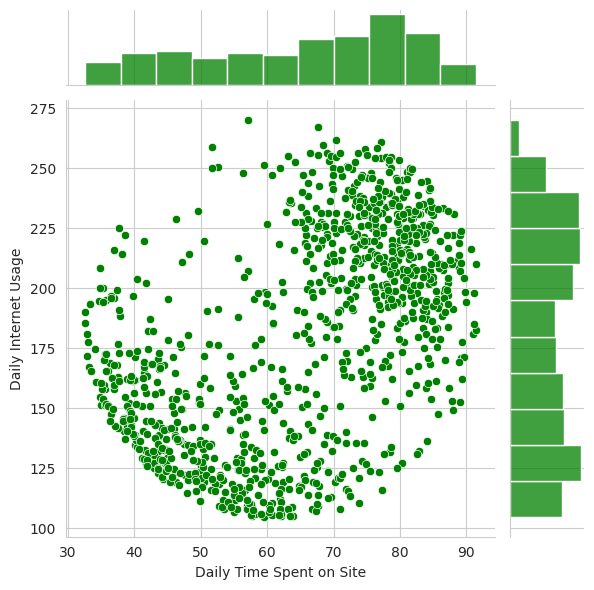

In [35]:
sns.jointplot(data=ADS, x='Daily Time Spent on Site', y='Daily Internet Usage', color='green')

Veriler, daha fazla site üzerinde zaman geçiren kullanıcıların genellikle daha fazla günlük internet kullanımına sahip olduğunu gösteriyor. Grafikte bir yoğunluk, özellikle günlük 75-125 dakika arası site üzerinde zaman geçiren ve 175-225 dakika arası internet kullanan kullanıcılar arasında görülüyor.

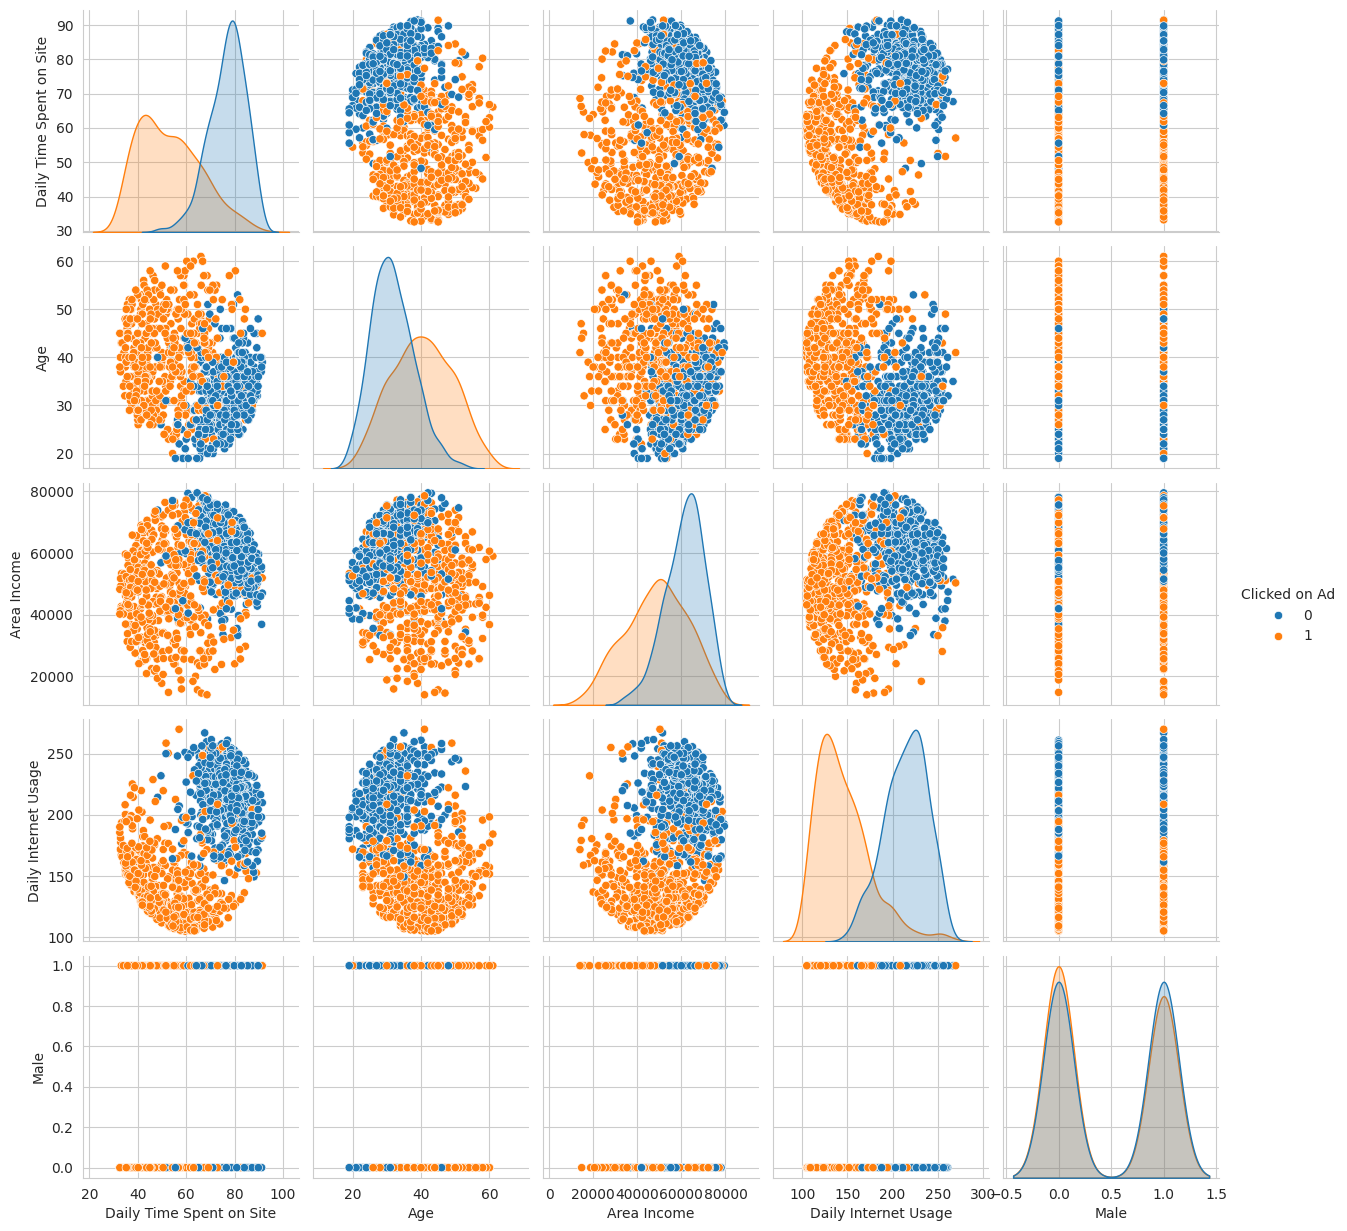

In [39]:
sns.pairplot(data=ADS, hue='Clicked on Ad')

Grafikte gösterilen çift değişkenli saçılım grafikleri ve tek değişkenli yoğunluk grafikleri, veriler arasındaki ilişkileri ve dağılımları gösteren bir çift değişkenli ızgara ve marjinal histogram/kde kombinasyonudur. Mavi noktalar bir reklama tıklamayan kullanıcıları, turuncu noktalar ise bir reklama tıklayan kullanıcıları temsil ediyor.

Yoğunluk grafikleri, kullanıcıların günlük olarak web sitesinde geçirdiği zaman, yaş, bölge geliri ve günlük internet kullanımı dağılımını gösteriyor. Reklama tıklayan ve tıklamayan gruplar arasında belirgin farklılıklar var: Örneğin, **daha düşük günlük internet kullanımına sahip olanlar daha sık reklama tıklıyor gibi görünüyor**. Yaş ve bölge geliri ile reklam tıklama arasında belirgin bir ayrım yok.

Erkek kullanıcıların (1 değeri) ve kadın kullanıcıların (0 değeri) reklamlara tıklama eğilimleri benzer dağılımlar gösteriyor, yani cinsiyetin reklama tıklama üzerinde önemli bir etkisi olmayabilir.

## Logistic Regression


In [66]:
ADS.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [67]:
X = ADS.drop(['Ad Topic Line',	'City',	'Country',	'Timestamp', 'Clicked on Ad'], axis=1)

y = ADS['Clicked on Ad']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
model = LogisticRegression()

In [70]:
model.fit(X_train, y_train)

LogisticRegression()

## Predictions and Evaluations


In [71]:
predictions = model.predict(X_test)

In [74]:
report = metrics.classification_report(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Conclusion


Bu projede, bir reklama tıklama davranışını tahmin etmek için lojistik regresyon modeli kullanılarak eğitim yapılmıştır. Model, kullanıcıların web sitede geçirdikleri zaman, yaş, bölgesel gelir, günlük internet kullanımı, reklam konusu, şehir, cinsiyet, ülke ve reklama tıklama zamanı gibi çeşitli özellikler temel alınarak oluşturulmuştur.

Modelin performansı, yüksek doğruluk (accuracy) ve F1 skoru ile oldukça etkileyici sonuçlar göstermiştir. Bu sonuçlar, her bir sınıf için sırasıyla %91 ve %94 gibi yüksek bir kesinlik (precision) ile %95 ve %90 gibi güçlü bir duyarlılık (recall) oranına işaret etmektedir. F1 skoru, her iki sınıf için de %93'tür, bu da modelin dengeli bir performans sergilediğini göstermektedir. Bu metrikler, modelimizin kullanıcı davranışlarını anlamak ve belirli bir kullanıcının reklama tıklayıp tıklamayacağını tahmin etmek için güçlü bir araç olduğunu kanıtlamaktadır. Sonuç olarak, bu model reklam kampanyalarının optimizasyonunda ve hedeflenen kullanıcı segmentasyonunda değerli bir kaynak olarak kullanılabilir.